In [1]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
import math

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

In [2]:
# find and import the profile closest to your target profile

def getClosestModel(modelNumber, workingDirectory):
    print('Looking for the profile closest to model #' + str(modelNumber) + ' in ' + str(workingDirectory))
    filenames = []

    for root, dirs, files in os.walk(workingDirectory):
        for file in files:
            if file.endswith("profiles.index"):
                filenames.append(os.path.join(root, file))

    profiles = []
    # import files
    for file in filenames:
        i = mr.MesaProfileIndex(file)
        profiles.append(i)

    # find the closest model number - ugly but functional
    closest = 0
    diff = 1e10
    profilePath = ''
    j = 0
    for index in profiles:
        values = index.model_numbers
        profileNums = index.profile_numbers
        k=0
        for i in values:
            if (abs(modelNumber - i) < diff):
                diff = abs(modelNumber - i)
                closest = i
                og = filenames[j]
                og = og[:-14] # put together the file name given the directory
                profilePath = og + 'profile' + str(profileNums[k]) + '.data'
            k+=1
        j+=1

    print('Actual model number: ' + str(closest))
    print('Difference between target and actual model: ' + str(diff))
    print('File path: ' + str(profilePath))
    print('')

    # import target profile
    p = mr.MesaData(profilePath)
    return p

directory = '/Users/emilyflynn/Desktop/25M_tests/15M_logs/'
p15 = getClosestModel(2050, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/20M_logs/'
p20 = getClosestModel(2377, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/25M_logs/'
p25 = getClosestModel(394, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/30M_logs/'
p30 = getClosestModel(294, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/50M_logs/'
p50 = getClosestModel(189, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/70M_logs/'
p70 = getClosestModel(905, directory)

Looking for the profile closest to model #2050 in /Users/emilyflynn/Desktop/25M_tests/15M_logs/
Actual model number: 2050
Difference between target and actual model: 0
File path: /Users/emilyflynn/Desktop/25M_tests/15M_logs/profile48.data

Looking for the profile closest to model #2377 in /Users/emilyflynn/Desktop/25M_tests/20M_logs/
Actual model number: 2400
Difference between target and actual model: 23
File path: /Users/emilyflynn/Desktop/25M_tests/20M_logs/profile55.data

Looking for the profile closest to model #394 in /Users/emilyflynn/Desktop/25M_tests/25M_logs/
Actual model number: 400
Difference between target and actual model: 6
File path: /Users/emilyflynn/Desktop/25M_tests/25M_logs/LOGS_to_si_burn/profile2.data

Looking for the profile closest to model #294 in /Users/emilyflynn/Desktop/25M_tests/30M_logs/
Actual model number: 300
Difference between target and actual model: 6
File path: /Users/emilyflynn/Desktop/25M_tests/30M_logs/LOGS_before_remove/profile13.data

Looking f

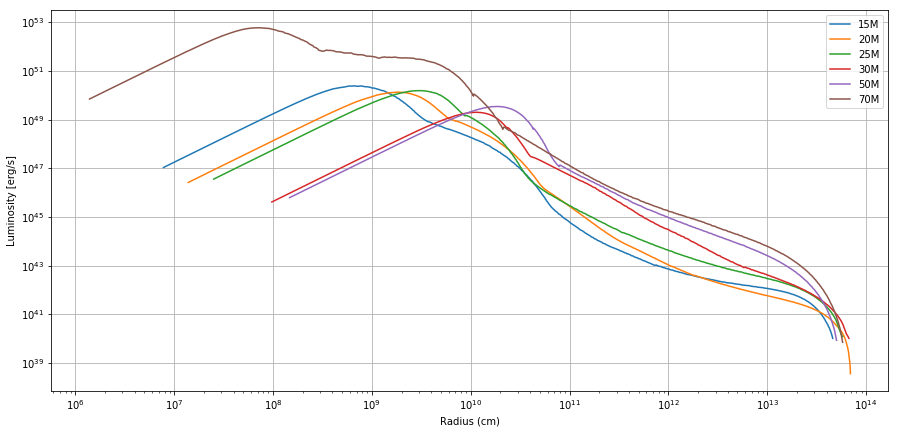

In [4]:
# max luminosity

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Radius (cm)')
plt.ylabel('Luminosity [erg/s]')
# plt.xlim(1e10, 1e15)
# plt.ylim(1e38, 1e46)
plt.grid(True)

def plotMaxLum(p, localSim):
    r = p.radius     # bring in the radius

    r = r*69.551e9   # change units to cm
    r = r[100:]      # cut off the first 100 points - takes care of surface weirdness

    # need: beta ~ 5, 4pi, density[r], radius, sound speed c[r]
    # define a constant, k
    k = 5 * 4 * math.pi

    # get density
    rho = p.logRho
    rho = 10**rho
    
    # get sound speed
    if localSim:
        c = p.csound
    
    else:
        # the web files don't have csound
        # csound=sqrt(5/3*pressure[r] / rho[r])
        ks = 5 * p.pressure / 3
        c = np.sqrt(ks / rho)
        
    c = c[100:]
    rho = rho[100:]

    lumMax = k * r**2 * rho * c**3
    plt.loglog(r, lumMax)
    return

plotMaxLum(p15, False)
plotMaxLum(p20, False)
plotMaxLum(p25, True)
plotMaxLum(p30, True)
plotMaxLum(p50, True)
plotMaxLum(p70, True)

plt.legend(('15M', '20M', '25M', '30M', '50M', '70M'))